# Credit Card Fraud Detection Using Machine Learning Algorithms

The objective of the project is to to detect all the fraudulent transactions while minimising incorrect fraud classification using various machine-learning techniques.


The dataset for the project is obtained from Kaggle - https://www.kaggle.com/mlg-ulb/creditcardfraud.

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and more background information about the data are not provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Initial Data Exploration

The initial data exploration takes a look at the dataset. Since the Time and Amount are the only non-anonymised features, we plot them to gain better understanding of their spread. A count of the fraud and non-fraud cases is done and visualised using barplot. In order to visualise the correlations between features, a heatmap is plotted.

In [195]:
#importing packages

%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [196]:
#loading data

df = pd.read_csv('creditcard.csv')

In [197]:
#shape of df

print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [198]:
#peek at data

df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
280128,169336.0,1.978519,-0.506993,-0.433000,0.256778,-0.574634,-0.058804,-0.762025,0.130668,1.002451,...,0.272640,0.953131,0.069908,-0.409304,-0.221743,0.654090,-0.027397,-0.064893,6.47,0
197158,131874.0,-0.639615,0.682628,-0.494643,-3.567312,1.100950,-0.973777,1.321718,-0.214526,1.231150,...,-0.119082,-0.297408,-0.265398,0.002273,0.173029,-0.544379,0.056094,0.198480,6.33,0
12057,20887.0,0.898614,0.033896,-0.083297,1.256326,0.554091,0.702342,0.155668,0.196360,1.160759,...,0.031511,0.278743,-0.027337,-0.708803,0.393032,-0.231545,0.011633,0.005579,89.99,0
114381,73459.0,-1.700176,-1.015949,0.908864,1.840242,-2.633577,1.301287,1.839787,0.503796,-0.046693,...,0.462240,0.343071,1.713486,0.315328,-0.672538,-0.516121,-0.059755,0.188826,664.29,0
123338,76886.0,1.224793,-0.224306,0.349243,-0.054538,-0.520068,-0.439207,-0.252007,-0.067826,0.476910,...,-0.222026,-0.773142,0.010701,-0.427701,0.094193,0.836428,-0.074503,0.014362,54.85,0


C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


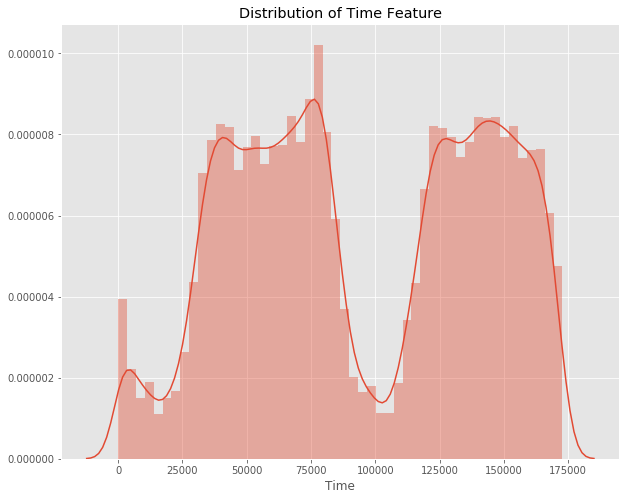

In [199]:
#visualizations of time and amount

plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

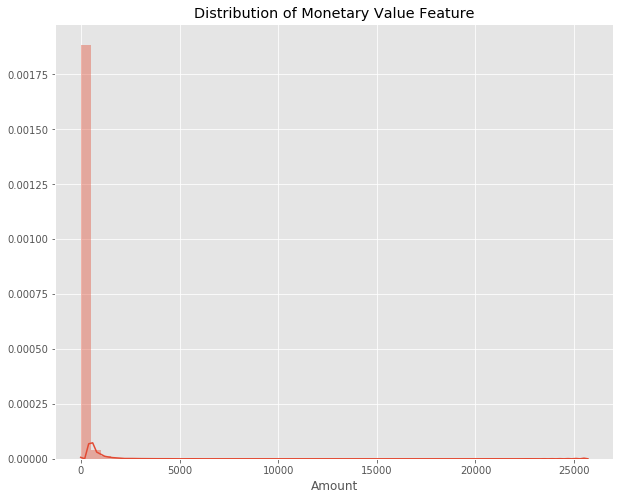

In [200]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [201]:
#count of fraud vs. normal transactions 

counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

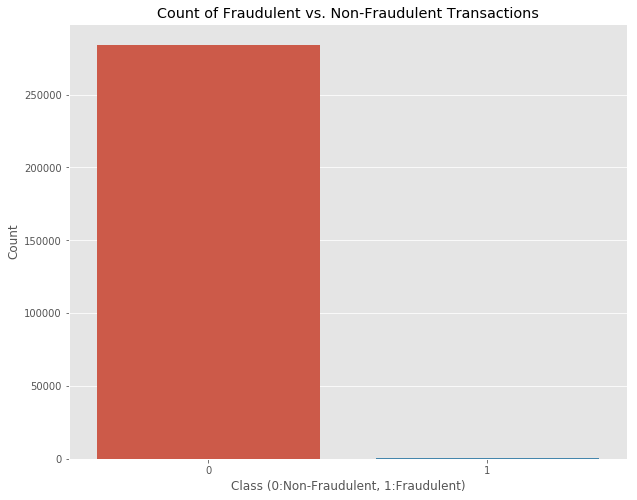

In [202]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

Text(0.5, 1.0, 'Heatmap of Correlation')

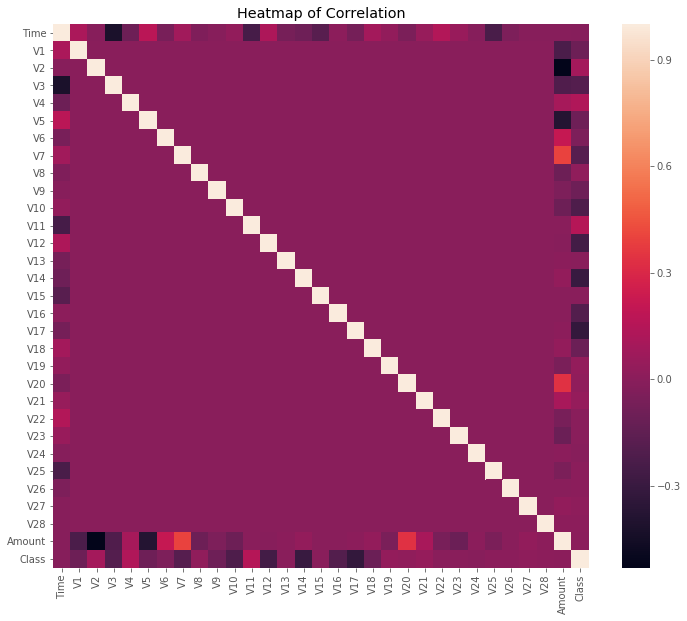

In [203]:
#finding correlation between columns and plotting heatmap

corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

### Scaling Amount and Time

Anonymised features appear to have been scaled and centred around zero but Amount and Time have not been scaled. For Logistic Regression to perform well, the features have to be scaled, so the code below scales Amount and Time features.

In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()

In [205]:
#scaling Time feature

scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]    # making a flat list out of a list of lists
scaled_time = pd.Series(flat_list1)

In [206]:
#scaling Amount feature

scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [207]:
# adding the scaled features and dropping the unscaled features from the original dataframe

df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.sample(5)



,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
123709,-2.523739,-0.720122,1.508034,0.835839,1.096848,-0.783538,-1.067556,-2.874562,1.316717,1.454514,...,-1.048594,-0.536229,0.551138,-0.754797,0.207350,0.141075,-0.376158,0,-0.155164,-0.374428
74061,-0.902820,1.744397,1.727772,2.551669,0.221096,0.410087,0.404484,0.212962,-1.937632,0.946265,...,0.481798,-0.383802,0.037904,0.275600,0.300109,-0.488075,-0.211381,0,-0.344114,-0.829827
27064,1.301947,-0.821718,0.239364,-0.452206,-1.050496,-0.469711,-0.635848,0.041741,-0.191001,0.515392,...,0.181544,-0.074553,0.059152,0.529104,-0.111737,0.002601,0.005503,0,-0.194985,-1.272843
60838,-1.497385,-0.388600,2.582151,-1.411574,-1.474815,0.523148,-1.169785,1.048666,-0.424769,-0.364877,...,0.951759,-0.173495,0.247661,0.396625,-0.138836,0.209678,0.009522,0,-0.143250,-0.953647
901,-0.722726,-0.151059,1.923479,-1.321697,-0.409027,-0.949167,-0.477109,0.078313,1.099615,-1.091278,...,0.643666,-0.112794,0.459768,-0.673286,0.013626,0.132681,0.123159,0,-0.353029,-1.982285


### Random Undersampling

The present dataset is highly imbalanced with the fraud cases forming an extremely small percentage of the whole. This poses a problem in training the algorithms. To deal with this problem, the technique of random undersampling - removal of samples from majority class, is used. 

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

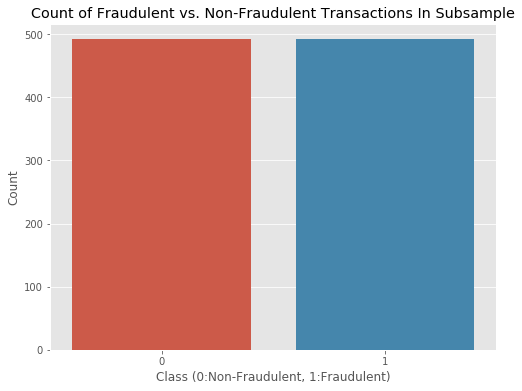

In [208]:

# undersampling with 1:1 ratio of legal and fraud transactions

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]



new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

### Outlier Detection and Removal

Here, features with high negative correlation and high positive correlation are identified. We then remove the outliers that lies outside 2.5 times the IQR in an attempt to eliminate the effect of outliers.

In [209]:
# correlation between features in the subsample

corr = under_sample.corr()
corr = corr[['Class']]

In [210]:
corr[corr.Class < -0.5] # features with high negative correlation

,Class
V3,-0.566577
V9,-0.556506
V10,-0.629201
V12,-0.681624
V14,-0.750237
V16,-0.597847
V17,-0.556681


In [211]:
corr[corr.Class > 0.5]  # features with high positive correlation

,Class
V4,0.705587
V11,0.682510
Class,1.000000


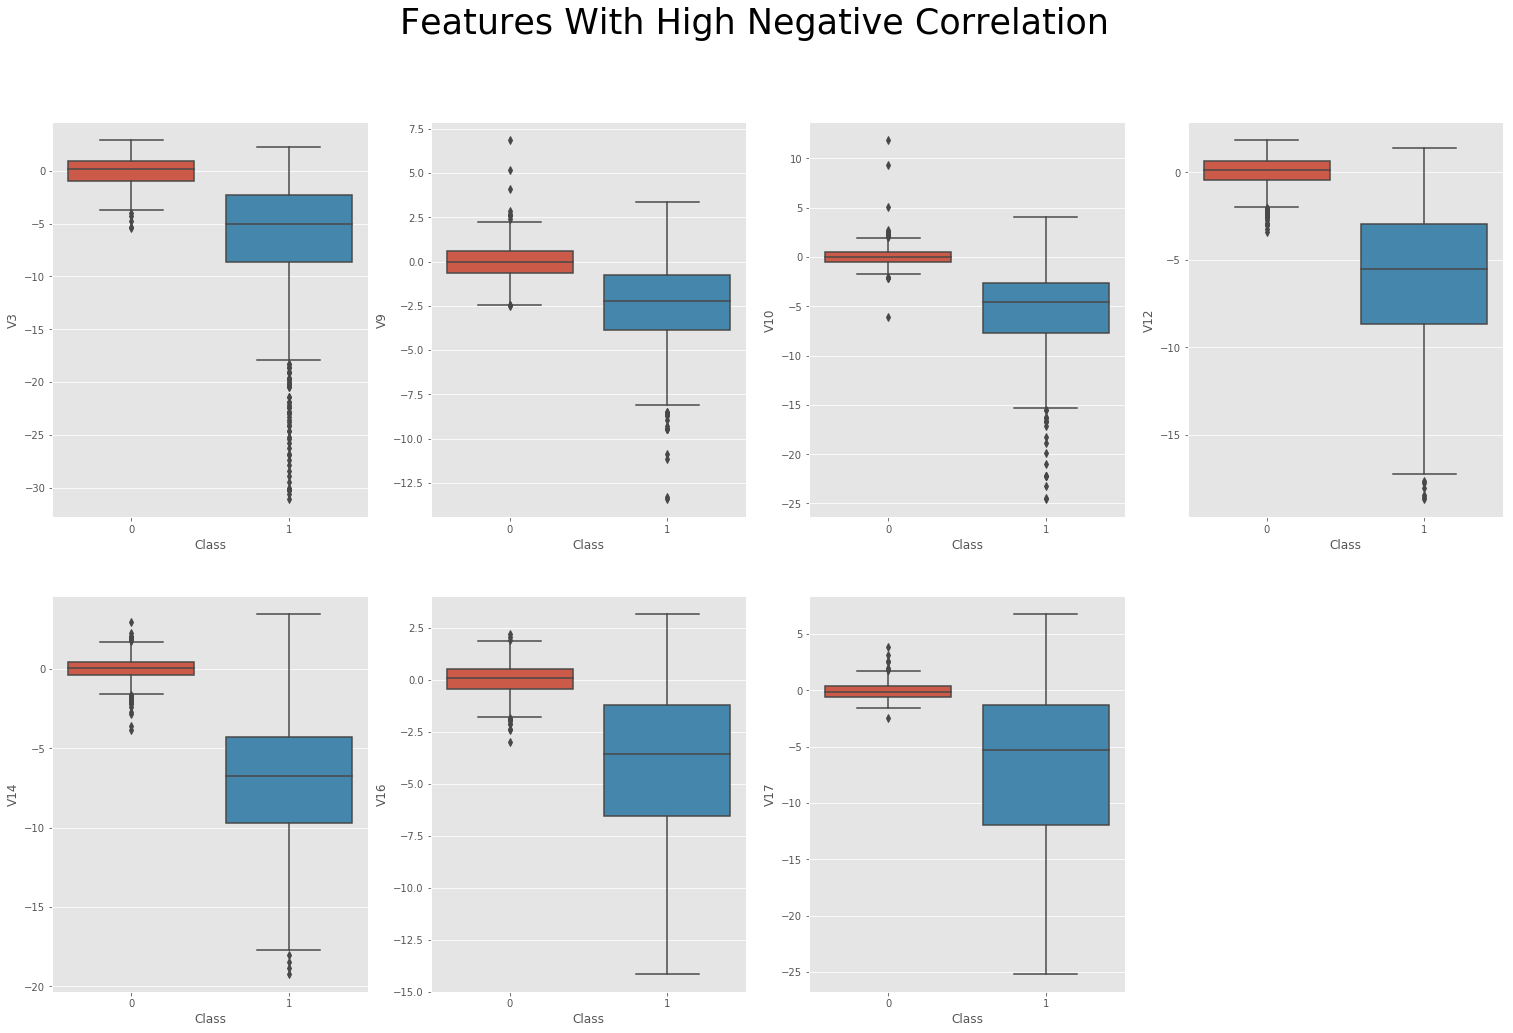

In [212]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=under_sample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=under_sample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=under_sample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=under_sample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=under_sample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=under_sample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=under_sample, ax=axes[1,2])
f.delaxes(axes[1,3])

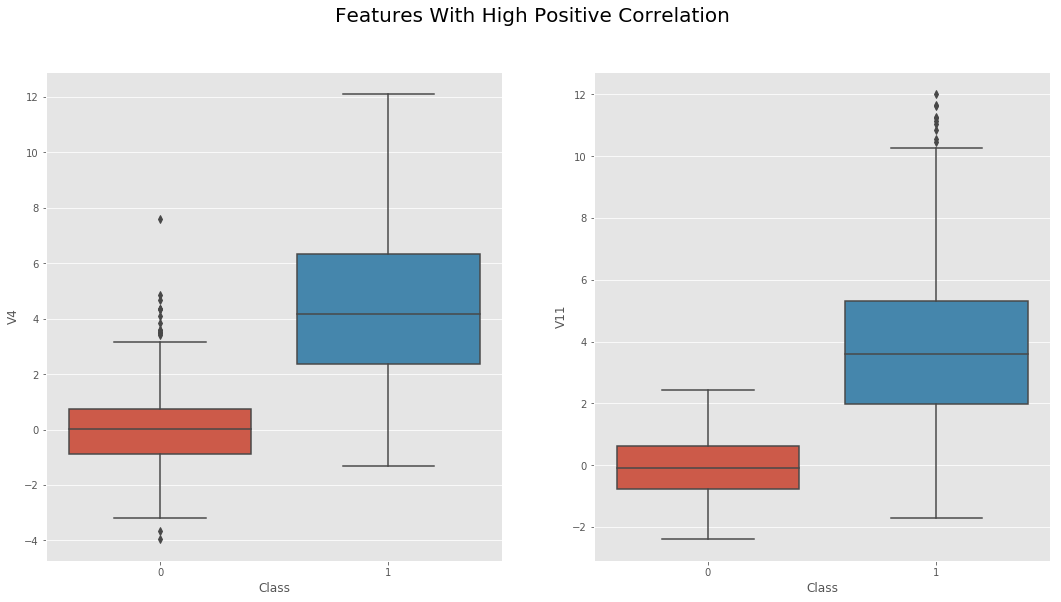

In [158]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=under_sample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=under_sample, ax=axes[1])

In [214]:
# removing extreme outliers
Q1 = under_sample.quantile(0.25)
Q3 = under_sample.quantile(0.75)
IQR = Q3 - Q1

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]



In [267]:
len_after = len(df2)
len_before = len(under_sample)
len_difference = len(under_sample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'
      .format(len_before, len_difference, len_after))

We reduced our data size from 25092 transactions by 2848 transactions to 22244 transactions.


In [216]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Splitting the data to evaluate performance

After removing extreme outliers, the dataset is now split into training set and testing set for further processes.

In [217]:
X = df2.drop('Class', axis=1)
y = df2['Class']

from sklearn.model_selection import train_test_split

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)


## Classification Algorithms

### Parameter Tuning

Three algorithms - Logistic Regression, Support Vector Machine and Random Forest are used to solve the problem. A comparative study is then followed by evaluating each algorithm with respect to selected performance metrics.
Simple logistic regression is used. For the parameters of Support Vector Machine and Random Forest, Grid Search technique is employed to tune the parameters.

In [223]:
#importing relevant packages

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score



In [226]:
# paramter tuning for Support Vector Machine

def svc_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params_svm = svc_param_selection(X_under_train,y_under_train)

print(best_params_svm)



{'C': 10, 'gamma': 0.001}


In [225]:
# parameter tuning for Random Forest

def rf_param_selection(X, y):
    param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

    grid_search = GridSearchCV(RandomForestClassifier(), param_grid)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

best_params = rf_param_selection(X_under_train,y_under_train)

print(best_params)



{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


### Evaluating Algorithms

The evaluation and comparison of algorithms is performed using K-fold cross validation. F1 score and ROC-AUC are used as performance metrics. The mean of each parameter across the k sets is displayed.

In [265]:
# comparison of the three algorithms


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9242971956405512
ROC-AUC: 0.9706274235691745


Support Vector Machine:

F1 Score: 0.9188589468803274
ROC-AUC: 0.9297199140727492


Random Forest:

F1 Score: 0.9307026313613227
ROC-AUC: 0.9450204332273134




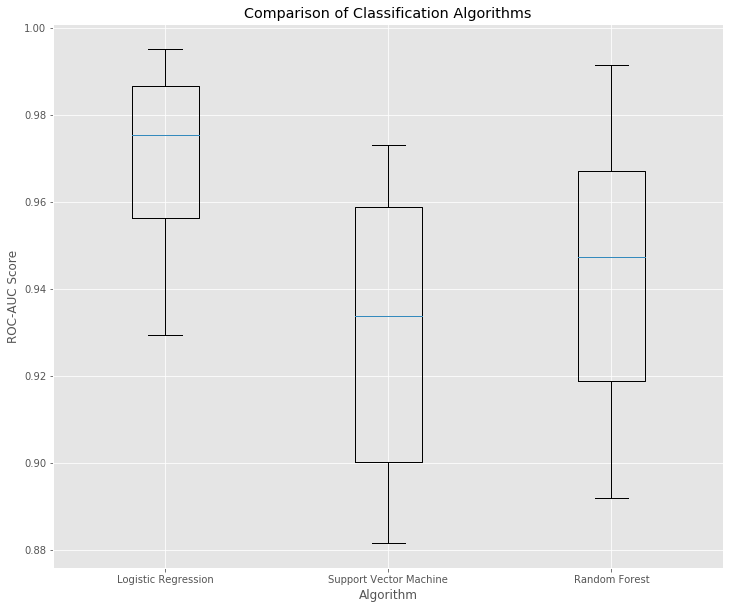

In [266]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### Using different Undersampling Ratios for evaluating performance

The technique of undersampling is used for handling the problem of imbalanced dataset. We previously evaluated the algorithms on 1:1 undersampling ratio dataset. Now we model the dataset with the real-world scenario, where the percentage of fraud is usually small. We now observe the performance of each algorithm with different undersampling ratios - 15%, 10%, 5% and 2%. Each time we remove the extreme outliers as before and then evaluate the performance with K-fold cross validation.

### 15% Undersampling Ratio

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

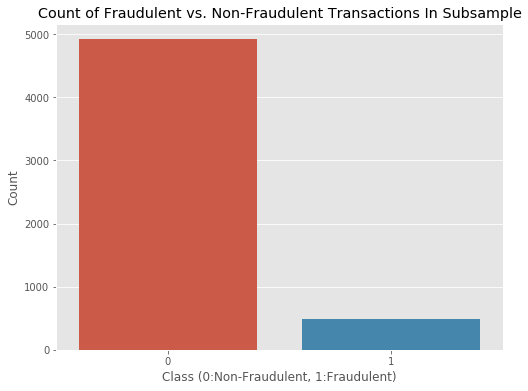

In [244]:
# 15% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.1), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]

new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')




#### Comparison of the various algorithms

In [245]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [247]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9430953211684592
ROC-AUC: 0.9740428652021113


Support Vector Machine:

F1 Score: 0.9275905816701909
ROC-AUC: 0.9672797774750752


Random Forest:

F1 Score: 0.9389806313225388
ROC-AUC: 0.9590617876609906




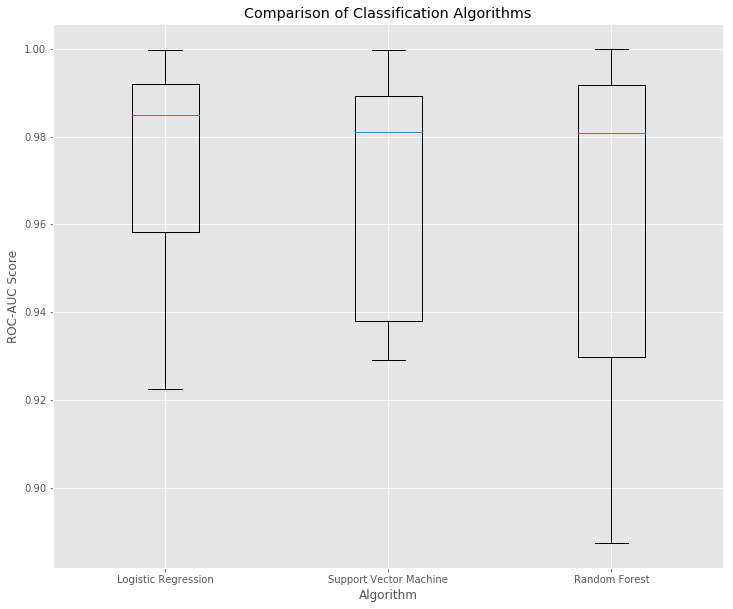

In [248]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### 10% Undersampling Ratio

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

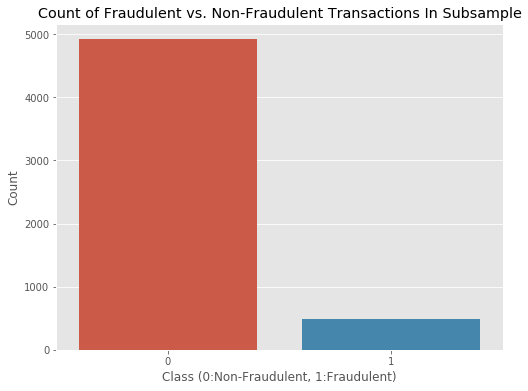

In [249]:
# 10% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.1), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]


new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')



#### Comparison of various algorithms

In [250]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [251]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))
#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9446464564161097
ROC-AUC: 0.9741273426215681


Support Vector Machine:

F1 Score: 0.9272860628197195
ROC-AUC: 0.9718420843574865


Random Forest:

F1 Score: 0.9412356784422032
ROC-AUC: 0.9689034248588386




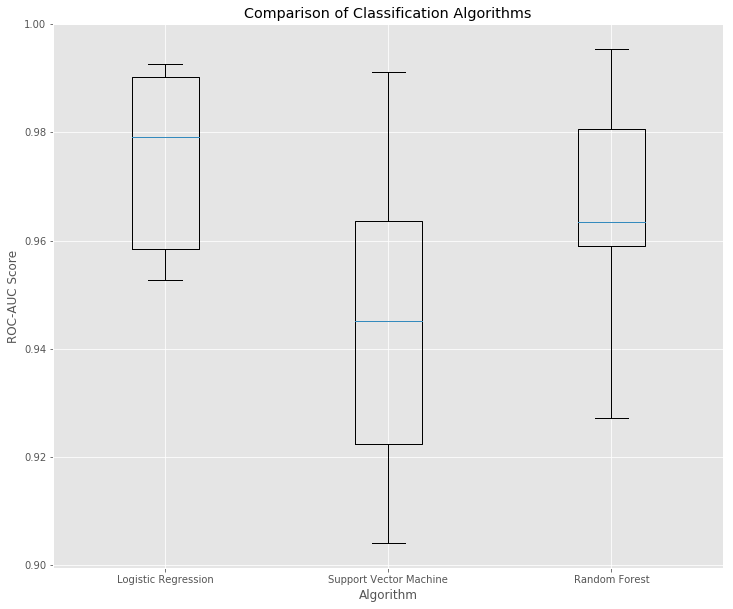

In [256]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

### 5% Undersampling Ratio

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

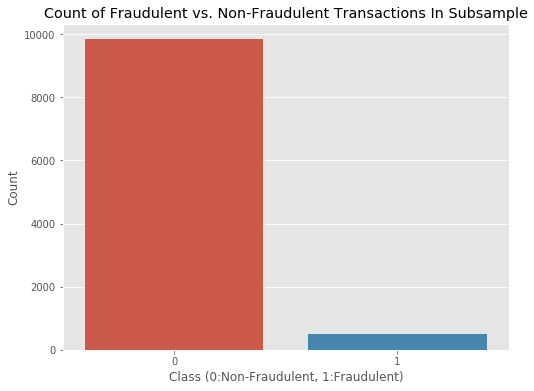

In [253]:
# 5% undersampling ratio

no_frauds = len(df[df['Class'] == 1])
non_fraud_indices = df[df.Class == 0].index
random_indices = np.random.choice(non_fraud_indices,(int)(no_frauds/0.05), replace=False)
fraud_indices = df[df.Class == 1].index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df.loc[under_sample_indices]


new_counts = under_sample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')



#### Comparison of various algorithms

In [254]:
# removing extreme outliers

df2 = under_sample[~((under_sample < (Q1 - 2.5 * IQR)) |(under_sample > (Q3 + 2.5 * IQR))).any(axis=1)]

X = df2.drop('Class', axis=1)
y = df2['Class']

# splitting into train and test data

X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [255]:
models = []

models.append(('Logistic Regression', LogisticRegression()))
models.append(('Support Vector Machine', SVC(kernel='rbf',C = best_params_svm['C'],gamma=best_params_svm['gamma'])))
models.append(('Random Forest', RandomForestClassifier(n_estimators=best_params['n_estimators'],
        min_samples_split=best_params['min_samples_split'],min_samples_leaf
     =best_params['min_samples_leaf'],max_features=best_params['max_features'],max_depth = best_params['max_depth'],
                                    criterion='gini')))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results_roc = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='roc_auc')
    cv_results_f = cross_val_score(model, X_under_train, y_under_train, cv=kfold, scoring='f1_macro')
    results.append(cv_results_roc)
    names.append(name)
    msg = '%s:\n' % (name)
    print(msg)
    print('F1 Score:',cv_results_f.mean())
    print('ROC-AUC:',cv_results_roc.mean())
    print('\n')

Logistic Regression:

F1 Score: 0.9249890521420522
ROC-AUC: 0.9745294311574499


Support Vector Machine:

F1 Score: 0.9220692863645674
ROC-AUC: 0.9453566327910542


Random Forest:

F1 Score: 0.9419151697576897
ROC-AUC: 0.9670469591269921




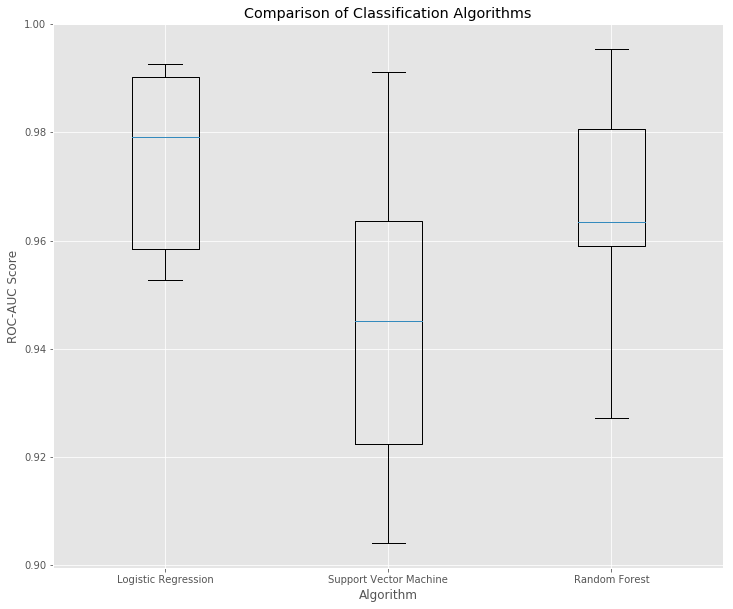

In [257]:
# Comparing the different algorithms


fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

## Conclusion


As we can observe above, as the ratio of fraud cases decreases the ROC-AUC and F1 score of Logistic Regression and Support Vector Machine show a downward trend whereas those of Random Forest show better performance. The F-score of Random Forest is better than the other two with decreasing ratio of fraud cases. This is an important performance indicator as it shows that the system is correctly classifying frauds as well as minimising errors in incorrect classification, both of which are extremely relevant to the real world scenario.
The performance of Random Forest can be further explored if the features are not anonymised and with further tuning of the hyperparameters. The tuning here is done by Grid Search whereas in further study, tuning can be improved by using Random Search followed by Grid Search to obtain better hyperparameters.